Data Set Information:

The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments.


Attribute Information:

This problem has the following inputs:
1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The only output is:
6. Scaled sound pressure level, in decibels.

#downloaded the file from below link
# https://archive.ics.uci.edu/ml/machine-learning-databases/00291/

In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#importing data
data = pd.read_csv('airfoil_self_noise.dat',sep="\s+",header=None)
data.shape

(1503, 6)

In [10]:
#looking at the header of the dataset
data.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [12]:
#looking at the basic statistics
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,1503.0,2886.380572,3152.573137,200.000000,800.000000,1600.000000,4000.000000,20000.000000
1,1503.0,6.782302,5.918128,0.000000,2.000000,5.400000,9.900000,22.200000
2,1503.0,0.136548,0.093541,0.025400,0.050800,0.101600,0.228600,0.304800
3,1503.0,50.860745,15.572784,31.700000,39.600000,39.600000,71.300000,71.300000
4,1503.0,0.011140,0.013150,0.000401,0.002535,0.004957,0.015576,0.058411
5,1503.0,124.835943,6.898657,103.380000,120.191000,125.721000,129.995500,140.987000


In [13]:
#looking at the NA Values
data.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

Univariate Analysis

In [23]:
#a function for univariate analysis
def univariate_analysis(df,col):
    df1=df.copy()
    plt.hist(df1[col])
    plt.title(col)
    plt.show()

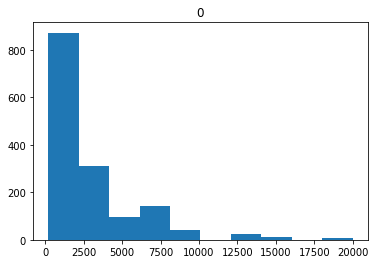

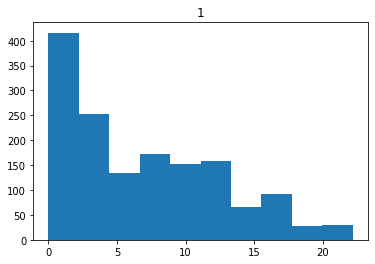

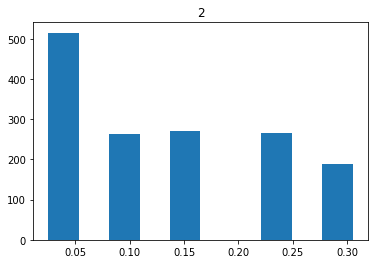

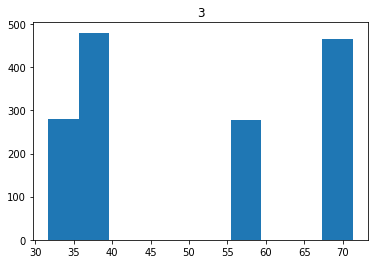

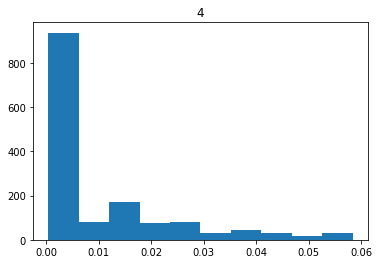

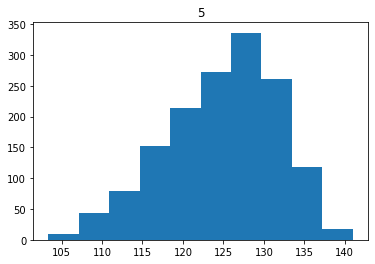

In [24]:
#distribution of variables
for col in data.columns.values:
    univariate_analysis(data,col)

In [26]:
data.corr()

,0,1,2,3,4,5
0,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
1,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
2,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
3,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
4,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
5,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


In [57]:
#dividing into train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.loc[:,[0,1,2,3,4]].values,data.loc[:,5].values,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((1202, 5), (301, 5))

In [31]:
#building the firstcut model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [59]:
optimizer = Adam(learning_rate=0.001)

In [67]:
regressor = Sequential()
regressor.add(Dense(units=12,activation='relu'))
regressor.add(Dense(units=6,activation='relu'))
regressor.add(Dense(units=1))

regressor.compile(optimizer=optimizer,loss='mean_squared_error',metrics=['mse'])


In [68]:
#train your model
regressor.fit(x=X_train,y=y_train,epochs=50,batch_size=32,verbose=2,validation_data=(X_test,y_test))

Train on 1202 samples, validate on 301 samples
Epoch 1/50
1202/1202 - 1s - loss: 269986.7211 - mse: 269986.7188 - val_loss: 24141.4087 - val_mse: 24141.4102
Epoch 2/50
1202/1202 - 0s - loss: 8501.6998 - mse: 8501.7002 - val_loss: 5760.5757 - val_mse: 5760.5762
Epoch 3/50
1202/1202 - 0s - loss: 5548.0350 - mse: 5548.0352 - val_loss: 4982.5668 - val_mse: 4982.5664
Epoch 4/50
1202/1202 - 0s - loss: 5093.9705 - mse: 5093.9712 - val_loss: 4850.7736 - val_mse: 4850.7734
Epoch 5/50
1202/1202 - 0s - loss: 4780.0297 - mse: 4780.0293 - val_loss: 4428.6916 - val_mse: 4428.6914
Epoch 6/50
1202/1202 - 0s - loss: 4567.8652 - mse: 4567.8652 - val_loss: 4056.1734 - val_mse: 4056.1736
Epoch 7/50
1202/1202 - 0s - loss: 4214.3119 - mse: 4214.3120 - val_loss: 3878.6660 - val_mse: 3878.6658
Epoch 8/50
1202/1202 - 0s - loss: 3961.5965 - mse: 3961.5964 - val_loss: 3639.8862 - val_mse: 3639.8857
Epoch 9/50
1202/1202 - 0s - loss: 3733.0285 - mse: 3733.0283 - val_loss: 3731.4691 - val_mse: 3731.4688
Epoch 10/50

In [69]:
#evaluating your model
regressor.evaluate(X_test,y_test)

301/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1451.4002795045162, 1451.4003]

In [70]:
#predicting in new data
y_pred = regressor.predict(X_test)

In [75]:
#evaluting the model
from sklearn.metrics import mean_squared_error
print("Root mean square of the Model is ", np.sqrt(mean_squared_error(y_test,y_pred)))

Root mean square of the Model is  38.09724699932497
